In [12]:
import os

import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [13]:
data_values = np.load("../data/data.npy")
label_data = np.load("../data/label.npy")

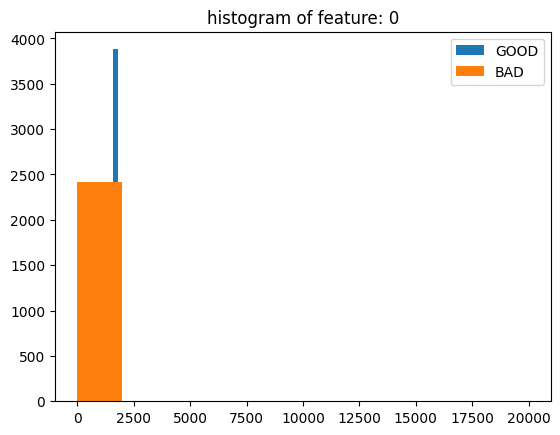

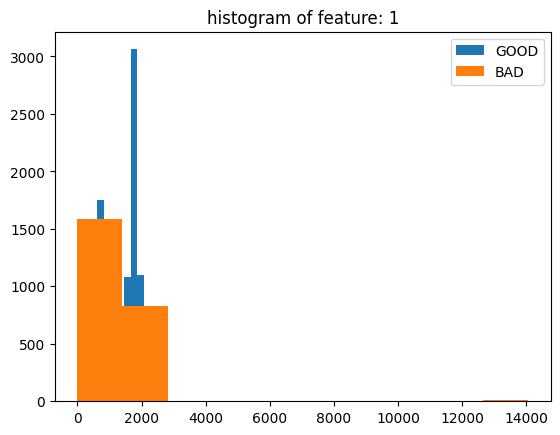

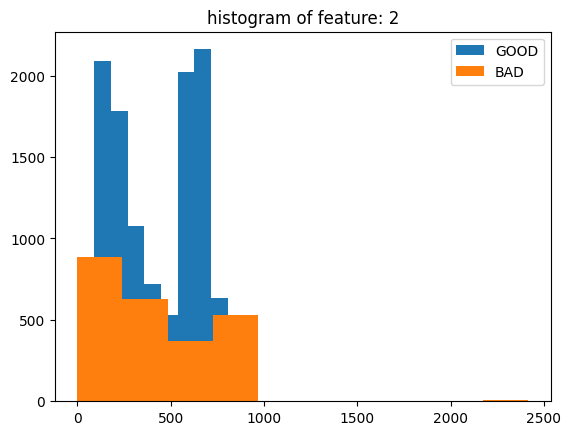

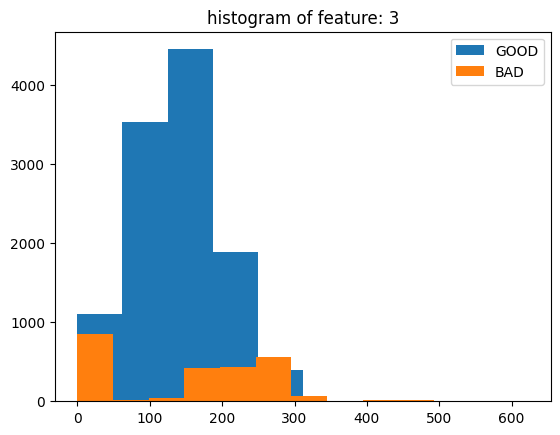

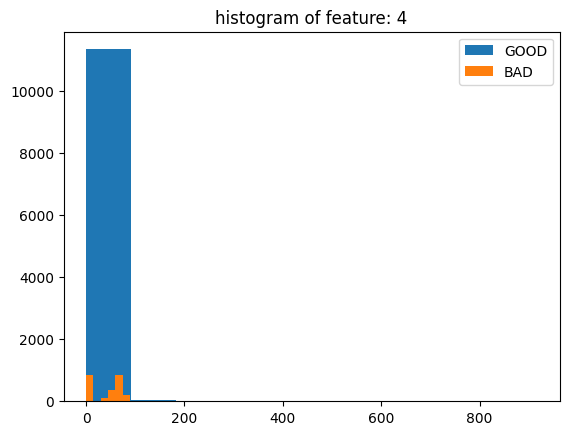

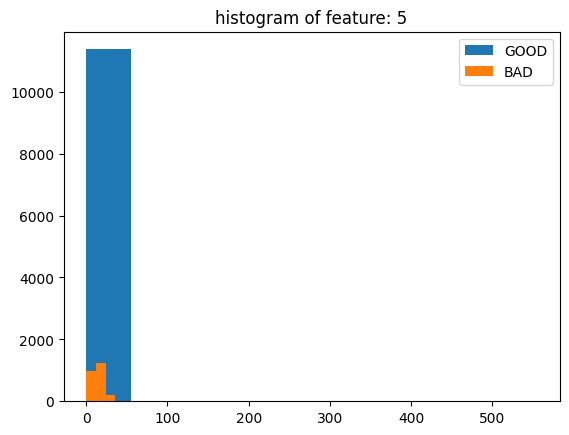

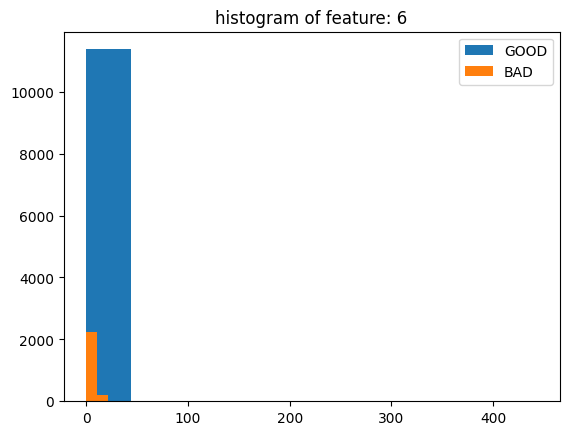

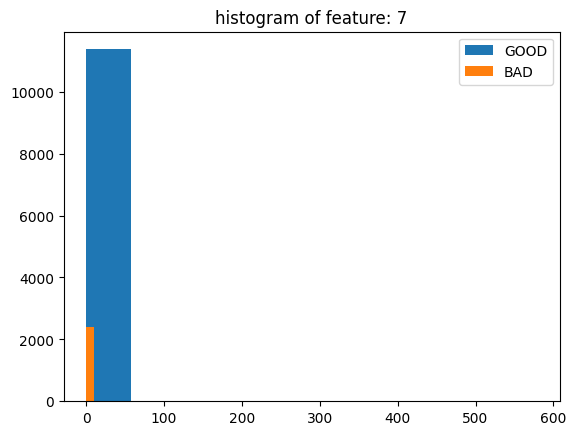

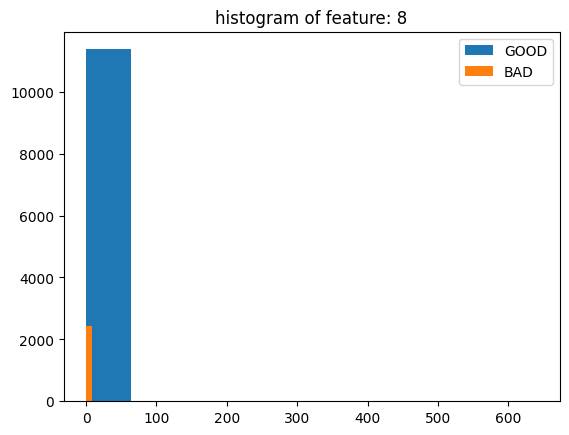

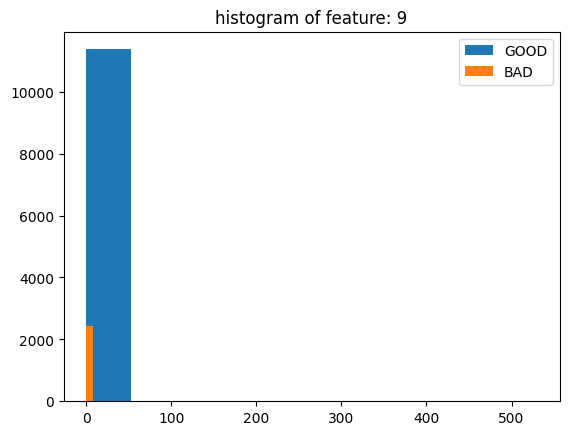

In [14]:
for col_idx in range(data_values.shape[1])[:10]:
    feature_values = data_values[:, col_idx]
    y_values_good = feature_values[label_data == 1]
    y_values_bad = feature_values[label_data == 0]
    plt.hist(y_values_good, label="GOOD")
    plt.hist(y_values_bad, label="BAD")
    plt.title(f"histogram of feature: {col_idx}")
    plt.legend()
    plt.show()
    plt.close()

In [15]:
scaler = MinMaxScaler()
scaler.fit(data_values)
norm_values = scaler.transform(data_values)
x_train, x_val, y_train, y_val = train_test_split(norm_values, label_data, test_size=0.25)

In [16]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_val, label=y_val)

In [17]:
param = {
    'eta': 0.1,
    'max_depth': 2,
    'nthread': 4,
    'objective': 'binary:logistic'
}
bst = xgb.train(params=param, dtrain=dtrain, num_boost_round=10)

In [73]:
preds = bst.predict(dval)
preds

array([0.9032354, 0.9032354, 0.6466099, ..., 0.6788575, 0.9032354,
       0.6788575], dtype=float32)

In [74]:
preds = np.where(preds > 0.5, 1, 0)

In [75]:
unique, counts = np.unique(preds, return_counts=True)
dict(zip(unique, counts))

{np.int64(0): np.int64(235), np.int64(1): np.int64(3215)}

In [76]:
print(classification_report(y_val, preds))
print("Accuracy Score: ", accuracy_score(y_val, preds))

              precision    recall  f1-score   support

         0.0       0.96      0.37      0.53       613
         1.0       0.88      1.00      0.93      2837

    accuracy                           0.88      3450
   macro avg       0.92      0.68      0.73      3450
weighted avg       0.89      0.88      0.86      3450

Accuracy Score:  0.8846376811594203


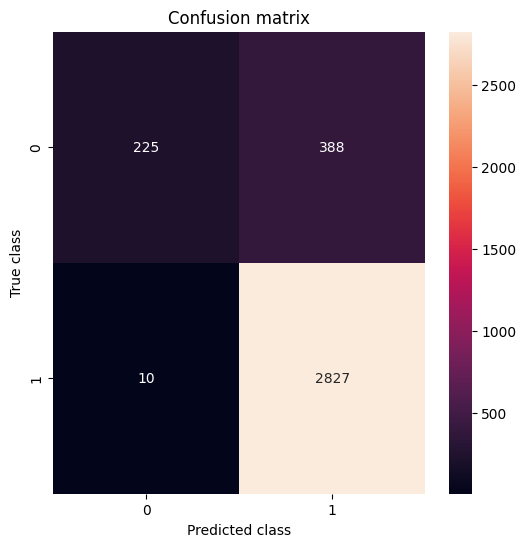

In [30]:
conf_matrix = confusion_matrix(y_val, preds)

plt.figure(figsize =(6, 6)) 
sn.heatmap(conf_matrix, annot=True, fmt="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class')
plt.xlabel('Predicted class') 
plt.show()

In [25]:
os.makedirs("../models/xgb", exist_ok=True)
bst.save_model("../models/xgb/0001.ubj")